In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
salaries = pd.read_csv('https://richardson.byu.edu/220/ds_salary.csv')
frequency_distribution = salaries["salary"].value_counts().sort_index()

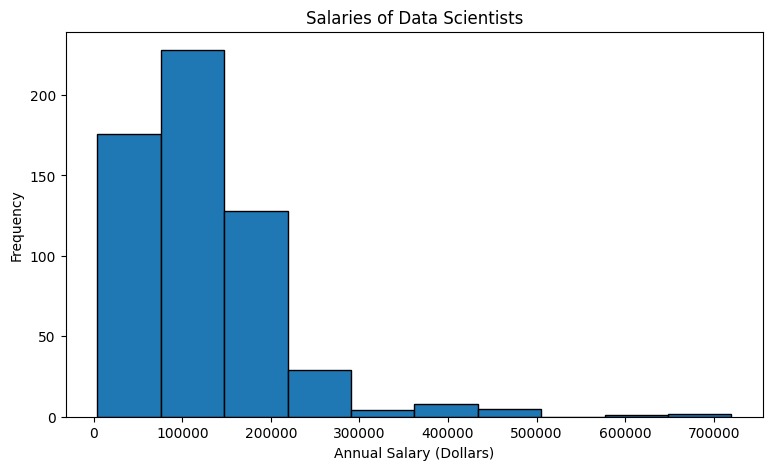

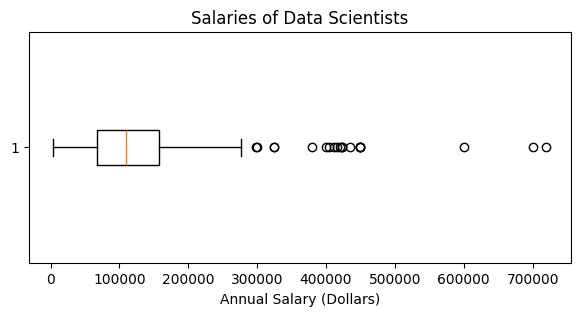



Min: $4000, Median: $110000.0, Max: $720000


'Looking at the data from a very basic analysis we can see that the average salary is clustered around $100000.\n\nThe data is also heavily skewed to the right as the tail leads up towards $700000.\n\n'

In [6]:
# Section 1: General Salary Data
plt.figure(figsize=(9, 5))
plt.hist(salaries["salary"], bins=10, edgecolor='black')
plt.title(f'Salaries of Data Scientists')
plt.xlabel("Annual Salary (Dollars)")
plt.ylabel('Frequency')
plt.show()



#Box Plot
plt.figure(figsize=(7, 3))
plt.boxplot(salaries["salary"], vert=False)
plt.title(f'Salaries of Data Scientists')
plt.xlabel("Annual Salary (Dollars)")
plt.show()

print("\n")
minimum = np.min(salaries["salary"])
median = np.median(salaries["salary"])
maximum = np.max(salaries["salary"])
print(f"Min: ${minimum}, Median: ${median}, Max: ${maximum}")

"""Looking at the data from a very basic analysis we can see that the average salary is clustered around $100000.

The data is also heavily skewed to the right as the tail leads up towards $700000.

"""

<Figure size 700x400 with 0 Axes>

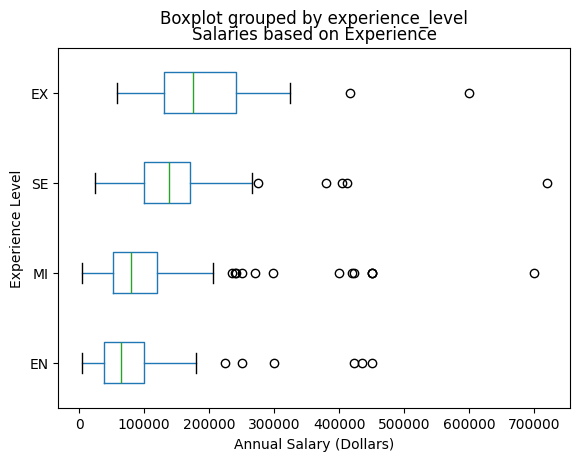

Experience Level: EN, Mean Salary: $84,397.20
Experience Level: MI, Mean Salary: $103,480.44
Experience Level: SE, Mean Salary: $142,566.63
Experience Level: EX, Mean Salary: $204,155.00


In [21]:
# Section 2: Effect of Experience on Salary

experience_order = ['EN', 'MI', 'SE', 'EX']

# Convert the experience_level column to categorical with the specified order
salaries['experience_level'] = pd.Categorical(salaries['experience_level'], categories=experience_order, ordered=True)

plt.figure(figsize=(7, 4))
salaries.boxplot(column="salary", by='experience_level', vert=False, grid=False)
plt.title('Salaries based on Experience')
plt.xlabel("Annual Salary (Dollars)")
plt.ylabel('Experience Level')
plt.show()

mean_salaries = salaries.groupby('experience_level', observed=True)['salary'].apply(np.mean)
for level, mean_salary in mean_salaries.items():
    print(f'Experience Level: {level}, Mean Salary: ${mean_salary:,.2f}')


Based on the boxplot, we can see a trend that as a person has more experience the higher their - on average -  salary will be. The means of each experience group reflect this trend, with a EX experience level salary being more than double the entry level salary. There are outliers in each group that lean towards the high end of the salary spectrum.

In [ ]:
# Section 3: Impact of Company Size on Salary

In [ ]:
# Section 4: Job Title Analysis

In [ ]:
# Section 5: Interactions Between Relationships

In [ ]:
# Section 6: Conclusion